# Homework 2 | MSCI:6100

**10 Points**

This assignment is mainly based on Modules 3 and 4 although a few questions may use previous modules.

## Module 3

1.a. (0.5 Point) The following code creates a list of sentences which are tricky for sentiment analysis. Apply the sentiment analyzers from AFINN, TextBlob, and VADER to each sentence. Store the sentiment scores together with the sentences in a four-column data frame called df1. The columns are named "text", "AFINN", "TextBlob", and "VADER". Column "text" contains the original sentences and the other columns store the sentiment scores.

In [1]:
tricky_sentences = [
     "Most automated sentiment analysis tools are shit.",
     "VADER sentiment analysis is the shit.",
     "Sentiment analysis has never been good.",
     "Sentiment analysis with VADER has never been this good.",
     "Warren Beatty has never been so entertaining.",
     "I won't say that the movie is astounding and I wouldn't claim that \
     the movie is too banal either.",
     "I like to hate Michael Bay films, but I couldn't fault this one",
     "It's one thing to watch an Uwe Boll film, but another thing entirely \
     to pay for it",
     "The movie was too good",
     "This movie was actually neither that funny, nor super witty.",
     "This movie doesn't care about cleverness, wit or any other kind of \
     intelligent humor.",
     "Those who find ugly meanings in beautiful things are corrupt without \
     being charming.",
     "There are slow and repetitive parts, BUT it has just enough spice to \
     keep it interesting.",
     "The script is not fantastic, but the acting is decent and the cinematography \
     is EXCELLENT!",
     "Roger Dodger is one of the most compelling variations on this theme.",
     "Roger Dodger is one of the least compelling variations on this theme.",
     "Roger Dodger is at least compelling as a variation on the theme.",
     "they fall in love with the product, but then it breaks \
     usually around the time the 90 day warranty expires",
     "the twin towers collapsed today",
     "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
     under orders and in the ''least offensive way possible.''"
  ]

In [2]:
#Your answer here

# Import Needed Libraries
import pandas as pd
from afinn import Afinn
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create initial Dataframe
df1=pd.DataFrame(tricky_sentences,columns=['text'])

# Initialize AFINN analyzer
afinn = Afinn(emoticons=True)

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

df1['AFINN'] = [afinn.score(s) for s in df1.text]
df1['TextBlob'] = [TextBlob(s).sentiment.polarity for s in df1.text]
df1['VADER'] = [analyzer.polarity_scores(s)['compound'] for s in df1.text]


#Check you answer
df1

,text,AFINN,TextBlob,VADER
0,Most automated sentiment analysis tools are shit.,-4.0,0.150000,-0.5574
1,VADER sentiment analysis is the shit.,-4.0,-0.200000,0.6124
2,Sentiment analysis has never been good.,3.0,0.700000,-0.3412
3,Sentiment analysis with VADER has never been t...,3.0,0.700000,0.5228
4,Warren Beatty has never been so entertaining.,2.0,0.500000,0.5777
5,I won't say that the movie is astounding and I...,6.0,0.150000,0.4215
6,"I like to hate Michael Bay films, but I couldn...",-1.0,-0.800000,0.3153
7,"It's one thing to watch an Uwe Boll film, but ...",-1.0,0.000000,-0.2541
8,The movie was too good,3.0,0.700000,0.4404
9,"This movie was actually neither that funny, no...",7.0,0.270833,-0.6759


1.b. (0.5 Point) Find one sentence from above where you think VADER performs better than the other two. Find one sentence from above where you think VADER performs worse. Explain why. The answer is not unique. You may want to first look at the sentences where VADER disagree with the other two in the sentiment polarity.  

Your answer here: There are two sentances that stick out. The first one is that "VADER sentiment analysis is the shit." Both AFINN and TextBlob rated these as negative sentiment sentances, however, in reality VADER probably has this sentance right. Without any additional context, it looks like this sentance was meant to be really positive, but both AFINN and TextBlob rated this one negatively. Only VADER was able to correctly pick up the sentiment which makes sense since VADER is built for more social media uses. This is a common way of showing positive sentiment even though most of the words in the sentance would have a negative sentiment.

2.a.  (1 Point)  The following code loads the data file **"classdata/BA_news_return.csv"** into a dataframe called **df2**. This data contains the headlines of the news about The Boeing Company published by Thomson Reuters each day in 2020. See column **headline**. It also contains the stock return of Boeing one day after the news being published. See column **nextday_RET**. Note that there can be multiple news on Boeing published on the same day.  If so, the **headline** field will contain the headlines of all news on that day. (They are concatenated into one string.)

In [3]:
import pandas as pd
df2 = pd.read_csv("classdata/BA_news_return.csv")
df2.head()

,date,nextday_RET,headline
0,2020-01-02,-0.001680,Major commercial plane crash deaths worldwide ...
1,2020-01-03,0.002945,RYANAIR CEO O'LEARY TELLS GERMANY'S WIRTSCHAFT...
2,2020-01-06,0.010607,MEDIA-U.S. regulators mull ordering extra simu...
3,2020-01-07,-0.017523,BOEING SUPPLIER SPIRIT AEROSYSTEMS OFFERS SOME...
4,2020-01-08,0.014998,"UPDATE 3-Boeing changes stance, recommends 737..."


Your task for this question: Evaluate the VADER sentiment score of each row in column **headline** and save it as a new column in **df2** called VADER. For the day with multiple news, do not split the headlines from the string but just simply apply VADER to the entire concatenated string.

In [4]:
#Your answer here
df2['VADER'] = [analyzer.polarity_scores(s)['compound'] for s in df2.headline]

#Check you answer
df2.head()

,date,nextday_RET,headline,VADER
0,2020-01-02,-0.001680,Major commercial plane crash deaths worldwide ...,0.9974
1,2020-01-03,0.002945,RYANAIR CEO O'LEARY TELLS GERMANY'S WIRTSCHAFT...,-0.8658
2,2020-01-06,0.010607,MEDIA-U.S. regulators mull ordering extra simu...,-0.9920
3,2020-01-07,-0.017523,BOEING SUPPLIER SPIRIT AEROSYSTEMS OFFERS SOME...,0.9898
4,2020-01-08,0.014998,"UPDATE 3-Boeing changes stance, recommends 737...",-0.9998


2.b. (0.5 Point) Convert column **date** to daytime type (such that we can sort and plot data with it).

In [5]:
#Your answer here (One line of code is enough)
df2["date"]=pd.to_datetime(df2["date"],format="%Y-%m-%d %H:%M:%S")

#Check your answer (It should show dtype('<M8[ns]'))
df2["date"].dtype

dtype('<M8[ns]')

2.c. (0.5 Point)  Sort **df2** by column **date**  in ascending order and reset the row index.

*Hint: See "List and Dataframe in Python.ipynb" if you forget how to sort a data frame and reset row index.*

In [6]:
#Your answer here
df2.sort_values(by='date',ascending = True, inplace = True)
df2.reset_index(drop=True,inplace=True)

#Check your answer
df2.head()

,date,nextday_RET,headline,VADER
0,2020-01-02,-0.001680,Major commercial plane crash deaths worldwide ...,0.9974
1,2020-01-03,0.002945,RYANAIR CEO O'LEARY TELLS GERMANY'S WIRTSCHAFT...,-0.8658
2,2020-01-06,0.010607,MEDIA-U.S. regulators mull ordering extra simu...,-0.9920
3,2020-01-07,-0.017523,BOEING SUPPLIER SPIRIT AEROSYSTEMS OFFERS SOME...,0.9898
4,2020-01-08,0.014998,"UPDATE 3-Boeing changes stance, recommends 737...",-0.9998


2.d. (1 Point) Create a line graph with **nextday_RET** on Y axis and **date** on X axis. You must smooth **nextday_RET** using its moving average with a window size of **15**. You can use any color, title, legend, and axis labels. See "BAReturn.png" in classdata folder in IDAS for an example.

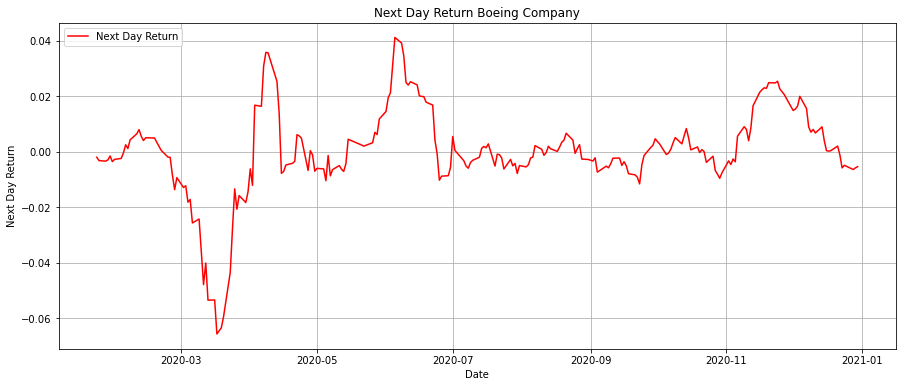

In [7]:
#Your answer here
import matplotlib.pyplot as plt                      # a library for visualization
# inline display of plots
%matplotlib inline

plt.figure(figsize=(15, 6))
plt.plot(df2.date, df2.nextday_RET.rolling(window=15).mean(), "-r", label="Next Day Return")
plt.legend(loc="upper left")
plt.title("Next Day Return Boeing Company")
plt.xlabel("Date")
plt.ylabel("Next Day Return")
plt.grid(axis='both')
plt.show()


2.e. (1 Point) Create a line graph with **VADER** on Y axis and **date** on X axis. You must smooth **VADER** using its moving average with a window size of **15**. You can use any color, title, legend, and axis labels. See "BAVADER.png" in classdata folder in IDAS for an example.

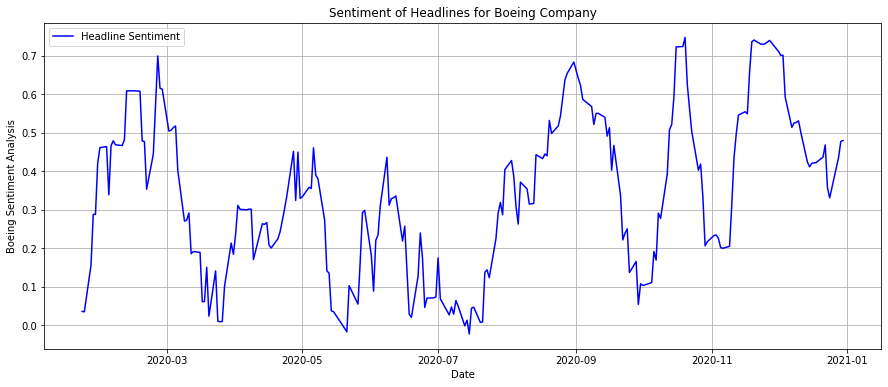

In [8]:
#Your answer here

plt.figure(figsize=(15, 6))
plt.plot(df2.date, df2.VADER.rolling(window=15).mean(), "-b", label="Headline Sentiment")
plt.legend(loc="upper left")
plt.title("Sentiment of Headlines for Boeing Company")
plt.xlabel("Date")
plt.ylabel("Boeing Sentiment Analysis")
plt.grid(axis='both')
plt.show()

2.f. (0.5 Point) According to the graphs, Boeing's stock price dropped significantly during March 2020; meanwhile, the sentiment score was also relatively low in March. To figure out what happed to Boeing in March, create a dataframe called **dftemp** which contains the rows from **df2** between "2020-03-01" and "2020-03-31". Don't forget to use .copy(). Then, reset the row index of dftemp.

*Hint: You can use Boolean condition (df2.date>="2020-03-01") & (df2.date<="2020-03-31"). Be careful that the parenthesis here are necessary. See "List and Dataframe in Python.ipynb" if you forget how to select rows from a data frame using boolean expression.*

In [9]:
# Your answer here:
dftemp = df2[(df2.date>="2020-03-01") & (df2.date<="2020-03-31")].copy()
dftemp.reset_index(inplace=True,drop=True)

# Check your answer
dftemp

,date,nextday_RET,headline,VADER
0,2020-03-02,-0.029903,SENIOR - PERFORMANCE IN 2020 WILL CONTINUE TO ...,-0.7944
1,2020-03-03,0.008909,AIR TRANSPORT SERVICES GROUP INC - 2020 PLAN I...,0.9889
2,2020-03-04,-0.080355,U.S. State Department approves possible $2.4 b...,0.9840
3,2020-03-05,0.007528,U.S. SENATE FINANCE CHAIRMAN GRASSLEY SAYS EU ...,0.9802
4,2020-03-06,-0.134030,Boeing 737 MAX certification flight could come...,-0.7379
5,2020-03-09,0.016904,FAA POISED TO REQUIRE ELECTRICAL WIRING FIXES ...,-0.9876
6,2020-03-10,-0.181507,"UPDATE 1-Boeing shares plunge on coronavirus, ...",0.9819
7,2020-03-11,-0.181087,ORBITAL CORPORATION LTD - SIGNED MOU WITH INSI...,-0.6859
8,2020-03-12,0.099199,UPDATE 3-Boeing to freeze hiring as cash woes ...,-0.6209
9,2020-03-13,-0.238484,Airbus: End of Washington state tax break of B...,-0.7804


2.g. (0.5 Point) Print the most negative headline in dftemp in terms of the VADER score. Again, for the day with multiple news, do not split the headlines from the string but just print the entire concatenated string. 

*Hint: You may sort the dftemp in an ascending order in column VADER, reset row index, and print the first (concatenated) headline. See "List and Dataframe in Python.ipynb" if you forget how to sort a data frame and reset row index.* 

In [10]:
# Your answer here:
dftemp.sort_values(by='VADER',ascending=True,inplace=True)
dftemp.reset_index(inplace=True,drop=True)
dftemp.headline[0]



"FAA POISED TO REQUIRE ELECTRICAL WIRING FIXES BEFORE BOEING 737 MAX JETS CAN FLY AGAIN - WSJ .\n BRIEF-FAA Poised To Require Electrical Wiring Fixes Before Boeing 737 Max Jets Can Fly Again - WSJ.\n Boeing proposal to avoid MAX wiring shift does not win U.S. support.\n PRESS DIGEST- Wall Street Journal - March 9.\n BOEING SHARES DOWN 9.2% PREMARKET AMID BROADER SELL-OFF; CO'S PROPOSAL TO AVOID MAX WIRING SHIFT DOES NOT WIN U.S. SUPPORT .\n Ethiopia says faulty sensor reading preceded Boeing crash in 2019 .\n UPDATE 1-Ethiopia says faulty sensor reading preceded Boeing crash.\n Family honours dream of son lost in Ethiopia plane crash.\n UPDATE 2-Ethiopia says faulty sensor reading preceded Boeing crash.\n Boeing shares plunge as FAA rejects proposal on MAX wiring .\n BOEING <BA.N>: UBS CUTS TARGET PRICE TO $284 FROM $333.\n ANALYSIS-Coronavirus to drive European airline industry shakeout.\n BOEING SHARES HIT OVER 2-1/2 YR LOW, LAST DOWN 8.3%.\n UPDATE 1-Family honours dream of son lost

## Module 4

Make sure you complete question 2 before you proceed as this question depends on **dftemp** from question 2. 

3.a. (1 Point) Convert column **headline** in **dftemp** from question 2 to a DTM based on the following instructions:

- Use the default tokenizer from sklearn library.
- Remove stop words in the list of nltk.
- Stem the tokens using the SnowBall stemmer from nltk.
- Create the DTM in term frequency.
- While creating the DTM, exclude any term whose document frequency is higher than %90. (Hint: set max_df.)

Save your DTM as a variable called DTM1. Print the shape of DTM1. 

In [11]:
#Your answer here:

# Required Imports
from sklearn.feature_extraction.text import CountVectorizer
import nltk     

# Define stop words
nltk_stopwords = nltk.corpus.stopwords.words("english")

# Define Stemmer
stemmer = nltk.stem.SnowballStemmer("english")  #You may use a different stemmer.

# Create class for countvectorizer with stemming included
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

# Initiate Vectorizer
vectorizer = StemmedCountVectorizer(stop_words=nltk_stopwords,max_df=0.9)

# Create DTM
DTM1 = vectorizer.fit_transform(dftemp['headline'])

#Check your answer:
DTM1.shape

(22, 1416)

3.b. (1 Point) Use the column sums of DTM1 from question 3.a. to calculuate the total frequency of each unique term. Save your output as a two-column data frame called **dffreq**, in which the terms are given in column "Term" and their frequencies are given in column "Frequency". Sort  **dffreq** by frequency in a descending order and reset the row index.

*Hint: Review "Count Total Frequency of a Term using DTM" in Document Vectorization.ipynb. If everything is correct, "coronavirus" should a top-3 keyword, suggesting the stock price might be affected by the outbreak in March 2020*

In [12]:
#Your answer here:
# Create Dataframe
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM1.sum(axis=0).tolist()[0]
                  })

# Sort Dataframe and reset index
dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)

#Check your answer:
dffreq.head(10)

/home/abromeland/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Frequency
0,say,142
1,updat,128
2,coronavirus,97
3,airlin,93
4,max,65
5,737,50
6,ceo,49
7,aircraft,46
8,cut,43
9,rate,41


3.c. (1 Point) Convert column **headline** in **dftemp** from question 2 to a DTM based on the following instructions:

- Use the default tokenizer from sklearn library. 
- Remove stop words in the list of nltk. 
- Do not stem the terms.
- Create DTM in TFIDF using bigrams. 
- Do not normalize the rows.

Save your DTM as a variable called DTM2. Print the shape of DTM2. 

In [13]:
#Your answer here:

# Required Import
from sklearn.feature_extraction.text import TfidfVectorizer

# Intialize vectorizer
vectorizer=TfidfVectorizer(stop_words=nltk_stopwords,
                           ngram_range=(2,2),
                           norm=None)

# Create DTM
DTM2 = vectorizer.fit_transform(dftemp['headline'])

#Check your answer:
DTM2.shape

(22, 4400)

3.d. (1 Point) Use the column sums of DTM2 from question 3.c. to calculuate the total TFIDF score of each unique bi-gram. Save your output as a two-column data frame called **dffreq**, in which the terms are given in column "Term" and their total TFIDF scores are given in column "Frequency". Sort  **dffreq** by the total TFIDF score in a descending order and reset the row index.

In [14]:
#Your answer here:

# Create Dataframe
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM2.sum(axis=0).tolist()[0]
                  })

# Sort and reset index
dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)

#Check your answer:
dffreq.head(10)

/home/abromeland/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Frequency
0,737 max,78.527243
1,global eagle,51.635206
2,boeing shares,49.486673
3,cathay pacific,48.590111
4,eagle entertainment,48.192858
5,ceo says,47.289212
6,trump says,45.553229
7,norwegian air,44.750511
8,boeing ba,38.540988
9,due coronavirus,37.890845
